# 神经网络的数学基础

## 初识神经网络

### 使用mnist数据集来创建第一个神经网络

#### 加载Keras中的MNIST数据集

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_images)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_images)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### 网络架构

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


#### 编译步骤

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#### 准备图像数据

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

#### 准备标签

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.2547 - acc: 0.9263
Epoch 2/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.1016 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0667 - acc: 0.9802
Epoch 4/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0493 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0363 - acc: 0.9889


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 59us/step
test_acc: 0.9765


### 神经网络的数据表示

张量：一个数据容器，它包含的数据几乎总是数值数据。矩阵是二维张量，张量是矩阵向任意维度的推广 [ 注意:张量的<span style='color:blue'><b>维度</b></span> (demension) 通常叫作<span style='color:blue'><b>轴</b></span> (axis) ]

#### 标量（ 0D 张量 ）
> 仅包含一个数字的张量叫作<span style="color:blue"><b> 标量</b></span>（scalar,也叫标量张量、零维张量、0D张量）。可以使用<span style="color:blue"><b> ndim </b></span>属性来查看张量的轴个数。

In [13]:
import numpy as np

x = np.array(12)
x

array(12)

In [14]:
x.ndim

0

#### 向量（ 1D 张量 ）
> 数字组成的数组叫作<span style="color:blue"><b>向量</b></span>( vector )或一维张量（ 1D 张量 ）。一维张量只有一个轴。

In [15]:
x = np.array((12, 2, 6, 14, 7))
x

array([12,  2,  6, 14,  7])

In [16]:
x.ndim

1

> 上面数组有5个元素，可以称为<span style="color:blue"><b> 5D 向量 </b></span>，但是不能称为<span style="color:blue"><b>5D 张量 </b></span>。

#### 矩阵（ 2D 张量）
> 向量组成的数组叫作<span style="color:blue"><b> 矩阵 </b></span>或二维张量（2D 张量）。矩阵有2各轴（通常叫作<span style="color:blue"><b>行</b></span>和<span style="color:blue"><b>列</b></span>）

In [17]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

#### 3D张量与更高维张量
> 将多个矩阵组合成一个新的数组，可以得到一个3D张量，可以直观的理解为数字组成的立方体。

In [18]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

> 将多个3D张量组合成一个数组，可以创建一个4D张量，以此类推。

#### 关键属性  
   * 张量是由以下三个关键属性来定义的：  
     1. <span style="color:blue"><b>轴的个数（阶）</b></span>。
     2. <span style="color:blue"><b>形状</b></span>。这是一个整数元祖，表示张量沿每个轴的维度大小（元素个数）。
     3. <span style="color:blue"><b>数据类型</b><span>。

In [19]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 轴的个数
print(train_images.ndim)

3


In [20]:
# 形状
train_images.shape

(60000, 28, 28)

In [21]:
# 数据类型，即dtype属性
train_images.dtype

dtype('uint8')

#### 显示上一个例子的第4个数字

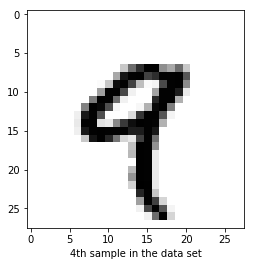

In [23]:
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.xlabel('4th sample in the data set')
plt.show()

#### 在Numpy中操作张量

在前面的例子中，使用语法 train_images[i] 来选择沿着第一个轴的特定数字。选 择张量的特定元素叫作张量切片（tensor slicing）。现在来看一下 Numpy 数组上的张量切片运算。

In [24]:
my_slice = train_images[10:100]
print((my_slice.shape))

(90, 28, 28)


#### 数据批量的概念

通常来说，深度学习中所有数据张量的第一个轴（0 轴，因为索引从 0 开始）都是<span style="color:blue"><b> 样本轴 </b></span> （samples axis，有时也叫<span style="color:blue"><b> 样本维度 </b></span>）。在 MNIST 的例子中，样本就是数字图像。 此外，深度学习模型不会同时处理整个数据集，而是将数据拆分成小批量。具体来看，下面是 MNIST 数据集的一个批量，批量大小为 128。

In [25]:
batch = train_images[:128]

然后是下一个批量

In [26]:
batch = train_images[128:256]

然后是第n个批量：batce = train_images[128 * n:128 * (n + 1)]

> 对于这种批量张量，第一个轴（0轴）叫作<span style="color:blue"><b> 批量轴 </b></span>（batch axis）或<span style="color:blue"><b> 批量维度 </b></span>（batch dimension）。在使用 Keras 和其他深度学习库时，你会经常遇到这个术语。

#### 显示世界中的数据张量

需要处理的数据几乎总是以下类别之一：
   * <span style="color:blue"><b> 向量数据 </b></span>:2D张量，形状为(samples, features)。
   * <span style="color:blue"><b> 时间序列数据 </b></span>或 <span style="color:blue"><b> 序列数据 </b></span>：3D张量，形状为（samples, timesteps, features）。
   *  <span style="color:blue"><b> 图像 </b></span>：4D张量，形状为（samples, height, width, channels）或（samples, channels, height,width）。
   *  <span style="color:blue"><b> 视频 </b></span>：5D张量，形状为（samples, frames, height, width, channels）或（samples, frames, channels, height, width）。

#### 向量数据

最常见的数据。对于这种数据集，每个数据点都被编码为一个向量，因此一个数据批量就被编码为 2D 张量（即向量组成的数组），其中第一个轴是<span style="color:blue"><b> 样本轴 </b></span>，第二个轴是<span style="color:blue"><b> 特征轴 </b></span>。

#### 逐元素运算

relu 运算和加法都是<span style="color:blue"><b> 逐元素</b></span>（element-wise）的运算，即该运算独立地应用于张量中的每个元素，也就是说，这些运算非常适合大规模并行实现（<span style="color:blue"><b> 向量化 </b></span>实现，这一术语来自于 1970—1990 年间<span style="color:blue"><b> 向量处理器 </b></span>超级计算机架构）。如果你想对逐元素运算编写简单的 Python 实现，那么可以用 for 循环。下列代码是对逐元素 relu 运算的简单实现。

In [31]:
def naive_relu(x):
    assert len(x.shape) == 2  # x 是一个Numpy的2D张量

    x = x.copy()             # 避免覆盖输入张量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

对于加法采用同样的实现方法：

In [32]:
def naive_add(x,y):
    assert len(x.shape) == 2  # x和y是Numpy的2D张量
    assert x.shape == y.shape
    
    x.copy()                  # 密码面覆盖输入张量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y [i,j]
    return x